In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, Concatenate, Flatten, Dense
from tensorflow.keras.models import Model

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define input shape
input_shape = (28, 28, 1)

# Define input layer
inputs = Input(shape=input_shape)

# Define parallel branches
branch1 = Conv2D(filters=32, kernel_size=3, dilation_rate=1, padding='same', activation='relu')(inputs)
branch2 = Conv2D(filters=32, kernel_size=3, dilation_rate=2, padding='same', activation='relu')(inputs)
branch3 = Conv2D(filters=32, kernel_size=3, dilation_rate=4, padding='same', activation='relu')(inputs)

# Concatenate the parallel branches
concat = Concatenate()([branch1, branch2, branch3])

# Flatten the concatenated features
flatten = Flatten()(concat)

# Add a dense layer for classification
outputs = Dense(units=10, activation='softmax')(flatten)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('Test accuracy:', test_acc)


Epoch 1/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.1301 - accuracy: 0.9620 - val_loss: 0.0584 - val_accuracy: 0.9810
Epoch 2/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0466 - accuracy: 0.9860 - val_loss: 0.0516 - val_accuracy: 0.9833
Epoch 3/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0561 - val_accuracy: 0.9835
Epoch 4/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0170 - accuracy: 0.9945 - val_loss: 0.0647 - val_accuracy: 0.9807
Epoch 5/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0101 - accuracy: 0.9967 - val_loss: 0.0587 - val_accuracy: 0.9832
Epoch 6/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.0663 - val_accuracy: 0.9822
Epoch 7/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0.0686 -

In [13]:
import numpy as np

num_images = 5
random_indices = np.random.randint(0, len(X_test), num_images)
images = X_test[random_indices]
labels = y_test[random_indices]

In [14]:
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)

1/1 [==============================] - 0s 167ms/step


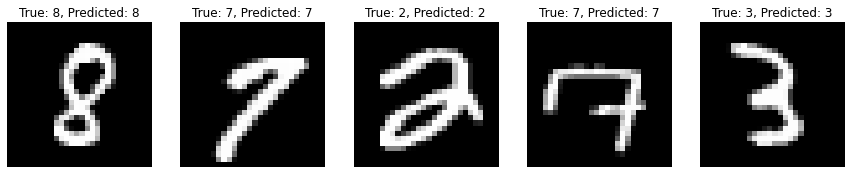

In [15]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, num_images, figsize=(15, 3))

for i in range(num_images):
    axes[i].imshow(images[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'True: {np.argmax(labels[i])}, Predicted: {predicted_labels[i]}')
    axes[i].axis('off')

plt.show()

In [6]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 28, 28, 32)   320         ['input_2[0][0]']                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 28, 28, 32)   320         ['input_2[0][0]']                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 28, 28, 32)   320         ['input_2[0][0]']                
                                                                                            

In [7]:
model.save("model4.h5")

In [8]:
from keras import applications
import onnx
from tensorflow.python.keras.models import load_model

In [9]:
import tensorflow as tf
model = tf.keras.models.load_model("model4.h5")
tf.saved_model.save(model, "tmp_model")

INFO:tensorflow:Assets written to: tmp_model\assets


INFO:tensorflow:Assets written to: tmp_model\assets


In [10]:
!python -m tf2onnx.convert --saved-model tmp_model --output "model4.onnx"

2023-06-14 14:55:30.948420: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-06-14 14:55:30.948460: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-14 14:55:35.774270: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-06-14 14:55:35.775335: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2023-06-14 14:55:35.776475: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2023-06-14 14:55:35.777523: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

In [11]:
import netron

In [12]:
netron.start("model4.onnx")

Serving 'model4.onnx' at http://localhost:8080


('localhost', 8080)